# Continued from Part 2...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

sns.set_style("white")

## Read Data

In [2]:
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set-cleaned.csv')
df

,diagnosis,texture_mean,concavity_mean,compactness_se,concave points_se,area_worst,smoothness_worst,symmetry_worst
0,1,10.38,0.30010,0.04904,0.01587,2019.0,0.16220,0.4601
1,1,17.77,0.08690,0.01308,0.01340,1956.0,0.12380,0.2750
2,1,21.25,0.19740,0.04006,0.02058,1709.0,0.14440,0.3613
3,1,20.38,0.24140,0.07458,0.01867,567.7,0.20980,0.6638
4,1,14.34,0.19800,0.02461,0.01885,1575.0,0.13740,0.2364
...,...,...,...,...,...,...,...,...
564,1,22.39,0.24390,0.02891,0.02454,2027.0,0.14100,0.2060
565,1,28.25,0.14400,0.02423,0.01678,1731.0,0.11660,0.2572
566,1,28.08,0.09251,0.03731,0.01557,1124.0,0.11390,0.2218
567,1,29.33,0.35140,0.06158,0.01664,1821.0,0.16500,0.4087


**Information : [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
* ID number 
* Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error (SE), and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

## Creating Model 
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [3]:
# Reading the Data and Performing Basic Data Checks
print(df.shape)
df.describe()

(569, 8)


,diagnosis,texture_mean,concavity_mean,compactness_se,concave points_se,area_worst,smoothness_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,19.289649,0.088799,0.025478,0.011796,880.583128,0.132369,0.290076
std,0.483918,4.301036,0.079720,0.017908,0.006170,569.356993,0.022832,0.061867
min,0.000000,9.710000,0.000000,0.002252,0.000000,185.200000,0.071170,0.156500
25%,0.000000,16.170000,0.029560,0.013080,0.007638,515.300000,0.116600,0.250400
50%,0.000000,18.840000,0.061540,0.020450,0.010930,686.500000,0.131300,0.282200
75%,1.000000,21.800000,0.130700,0.032450,0.014710,1084.000000,0.146000,0.317900
max,1.000000,39.280000,0.426800,0.135400,0.052790,4254.000000,0.222600,0.663800


In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

In [5]:
# Creating the Training and Test Datasets
target_column = ['diagnosis']
predictors = list(set(list(df.columns))-set(target_column))

X = df[predictors].values
y = df[target_column].values
y = np.ravel(y,order = 'C')

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(455, 7)
(114, 7)
(455,)
(114,)


## XGBoost

In [7]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 9)

#putting in the best parameters from GridsearchCV (part 2) to train our model
xgb = xgb.XGBClassifier(objective = "binary:logistic", seed=9, colsample_bytree=0.7, eta=0.05, gamma=0.4, max_depth=3, 
                        min_child_weight=1, reg_alpha=0.005)

cross_val_score(xgb, X, y, cv=kf, scoring='accuracy')

print("XGBoost Algorithm Accuracy Score : {:.2f}%".
      format(100*np.mean(cross_val_score(xgb, X, y, cv=kf, scoring='accuracy'))))

XGBoost Algorithm Accuracy Score : 97.54%


### Confusion Matrix

In [8]:
from sklearn.model_selection import cross_val_predict
clf=xgb.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
# print the first 25 true and predicted responses
print('True', y_test[0:25])
print('Pred', y_pred[0:25])

True [1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]
Pred [1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


In [10]:
from sklearn import metrics

In [11]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[73  1]
 [ 3 37]]


### Basic terminology

0: negative class
1: positive class

True positive (TP): Prediction is +ve and X has CV diseases, we want that

True negative (TN): Prediction is -ve and X is healthy, we want that too

False positive (FP): Prediction is +ve and X is healthy, false alarm, bad

False negative (FN): Prediction is -ve and X has CV diseases, the worst


#### Which metrics should you focus on?
Choice of metric depends on your business objective
- Identify if FP or FN is more important to reduce

Choose metric with relevant variable (FP or FN in the equation)

Detection of CV filter (positive class is "detection of CV"):
Optimize for precision or specificity
- precision: false negative as variable
- specificity: false negative as variable

In this study, false positives are just a false alarm. With a 2nd more detailed scan it’ll be corrected. But a false negative label, this means that they think they’re healthy when they’re not, which is — in our problem — the worst case of the 4.

### <font color="magenta"> Choose Recall (aka Sensitivity)
If the idea of false positives is far better than false negatives, in other words, if the occurrence of false negatives is unaccepted/intolerable, that you’d rather get some extra false positives(false alarms) over saving some false negatives. 

You’d rather get some healthy people labeled with CV diseaseas over leaving a person with CV disease labeled healthy.

Let's aim to get FN < FP.

#### Adjusting Classification Threshold

In [12]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    detect_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(detect_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['miss', 'hit'],
           yticklabels=['miss', 'hit']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [13]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(xgb, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [14]:
y_predict = xgb.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.9737,   Recall: 0.9250


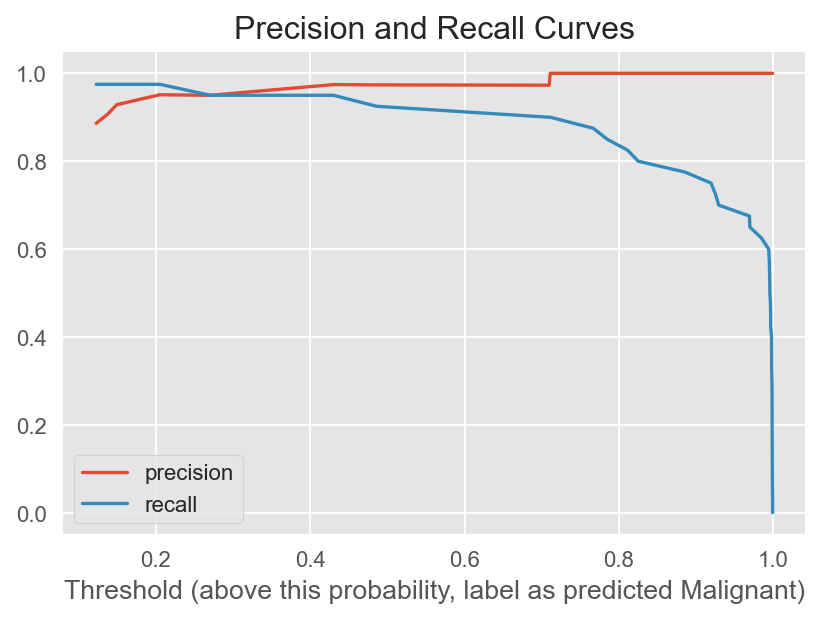

In [15]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as predicted Malignant)');
plt.title('Precision and Recall Curves');

In [33]:
y_predict = (xgb.predict_proba(X_test)[:,1] > 0.10)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.8889,   Recall: 1.0000


#### ROC Curve & AUC 
ROC : Receiver Operating Characteristic 

AUC: Percentage of the ROC plot that is underneath the curve (Area under Curve)

In [17]:
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1]) 

ROC AUC score =  0.9969594594594595


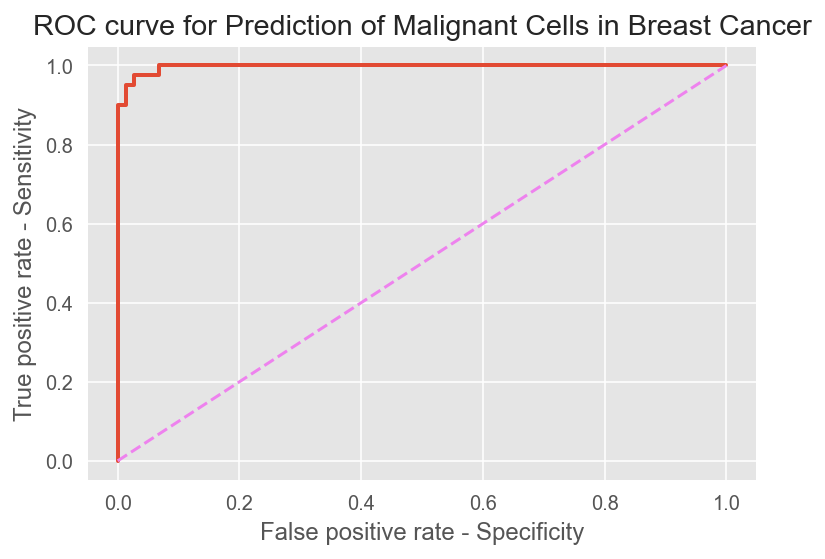

In [18]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate - Specificity')
plt.ylabel('True positive rate - Sensitivity')
plt.title('ROC curve for Prediction of Malignant Cells in Breast Cancer');
print("ROC AUC score = ", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

In [19]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [20]:
evaluate_threshold(0.5)

Sensitivity: 0.9
Specificity: 0.9864864864864865


In [34]:
evaluate_threshold(0.1)

Sensitivity: 1.0
Specificity: 0.9324324324324325


In [22]:
#Log loss
from sklearn.metrics import log_loss

ll=log_loss(y_test, xgb.predict_proba(X_test))
print("Log-loss on rf: {:.4f}".format(log_loss(y_test, xgb.predict_proba(X_test))))

Log-loss on rf: 0.0805


In [23]:
#F1 score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

xgb_f1_score = f1_score(y_test,xgb.predict(X_test))
print("F1 score on rf: {:.3f}".format(f1_score(y_test,xgb.predict(X_test))))

F1 score on rf: 0.949


In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_test)))) 

Log-loss on dummy classifier: 16.0575


C:\Users\HP\anaconda3\envs\metis\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [25]:
print("XGBoost accuracy: {:6.4f}".format(xgb.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

XGBoost accuracy: 0.9649
Dummy accuracy: 0.5263


In [26]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

#support : no of observation

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

